In [ ]:
#Some necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


# **A.3 Step 3: Collecting Data**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/mcdonalds.csv')

# **A.4 Step 4: Exploring Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
MD_x = df.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#performing pca for dimension reduction

pca = PCA()
MD_pca = pca.fit(MD_x)

In [ ]:
std_dev = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
pca_summary_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_variance
})
new_column_names = ['PCA' + str(i) for i in range(1, 12)]
transposed_df = pca_summary_df.T
transposed_df.columns = new_column_names
transposed_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
Standard Deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


In [ ]:
std_dev = np.round(np.sqrt(pca.explained_variance_), 1)
print("Standard Deviation:\n",std_dev)

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [ ]:
rotation_matrix = np.round(pca.components_, 3)*-1

df=pd.DataFrame(rotation_matrix.T)
df.columns=new_column_names
new_row_names = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy',
    'fast', 'cheap', 'tasty', 'expensive', 'healthy',
    'disgusting'
]
df.index=new_row_names
df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [ ]:
pca_scores = pca.transform(MD_x)

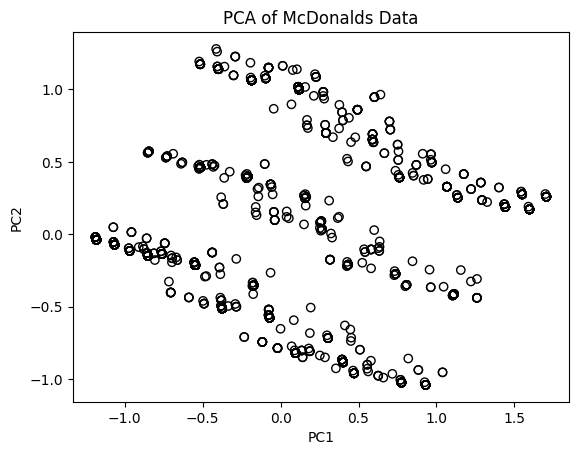

In [ ]:
plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], edgecolor='black', facecolors='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Data')
plt.show()

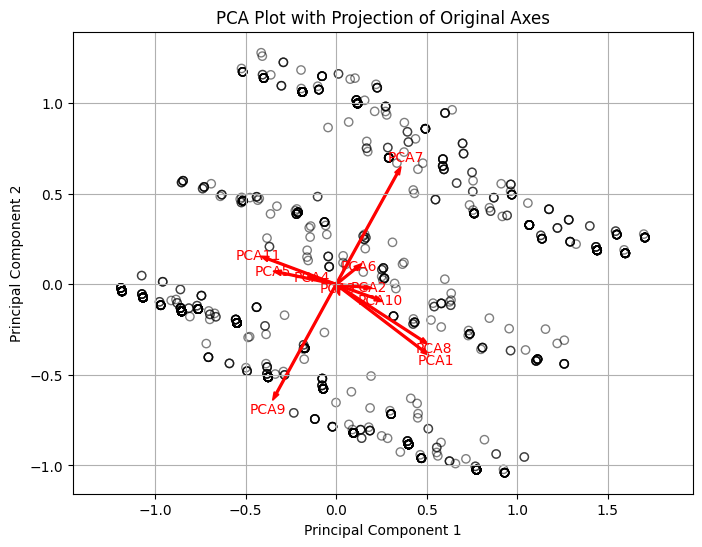

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], edgecolor='black', facecolors='none', alpha=0.5)

#projection of the original axes
for i, component in enumerate(rotation_matrix.T):
    plt.arrow(0, 0, component[0], component[1], color='red', width=0.01, head_width=0.03)
    plt.text(component[0] * 1.15, component[1] * 1.15, new_column_names[i], color='red', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projection of Original Axes')
plt.grid(True)
plt.axis('equal')
plt.show()

# **A.5.1 Using k-Means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [ ]:
np.random.seed(1234)
data = MD_x

In [ ]:
MD_x = np.random.rand(100, 2)

In [ ]:
def kmeans_clustering(data, n_clusters, n_init):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
    kmeans.fit(data)
    return kmeans.labels_, kmeans

In [ ]:
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(data)

In [ ]:
results = {}
kmeans_models = []
inertias = []
stability_scores = {k: [] for k in range(2, 9)}
num_replications = 10

In [ ]:
#Clustering Analysis and Stability Assessment

for n_clusters in range(2, 9):
    labels, kmeans_model = kmeans_clustering(data, n_clusters, 10)
    kmeans_models.append(kmeans_model)
    inertias.append(kmeans_model.inertia_)

    # Stability assessment
    labels_list = [perform_kmeans(data, n_clusters) for _ in range(num_replications)]
    for i in range(num_replications):
        for j in range(i + 1, num_replications):
            score = adjusted_rand_score(labels_list[i], labels_list[j])
            stability_scores[n_clusters].append(score)

    # Analyzing the clusters
    unique, counts = np.unique(labels, return_counts=True)
    cluster_distribution = dict(zip(unique, counts))


    results[n_clusters] = {
        "Cluster Distribution": cluster_distribution,
    }

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Results for 2 Segments:
  Cluster Distribution: {0: 896, 1: 557}
Results for 3 Segments:
  Cluster Distribution: {0: 338, 1: 497, 2: 618}
Results for 4 Segments:
  Cluster Distribution: {0: 513, 1: 366, 2: 242, 3: 332}
Results for 5 Segments:
  Cluster Distribution: {0: 391, 1: 234, 2: 264, 3: 309, 4: 255}
Results for 6 Segments:
  Cluster Distribution: {0: 241, 1: 136, 2: 263, 3: 278, 4: 229, 5: 306}
Results for 7 Segments:
  Cluster Distribution: {0: 230, 1: 235, 2: 234, 3: 150, 4: 159, 5: 282, 6: 163}
Results for 8 Segments:
  Cluster Distribution: {0: 171, 1: 270, 2: 289, 3: 126, 4: 138, 5: 218, 6: 138, 7: 103}


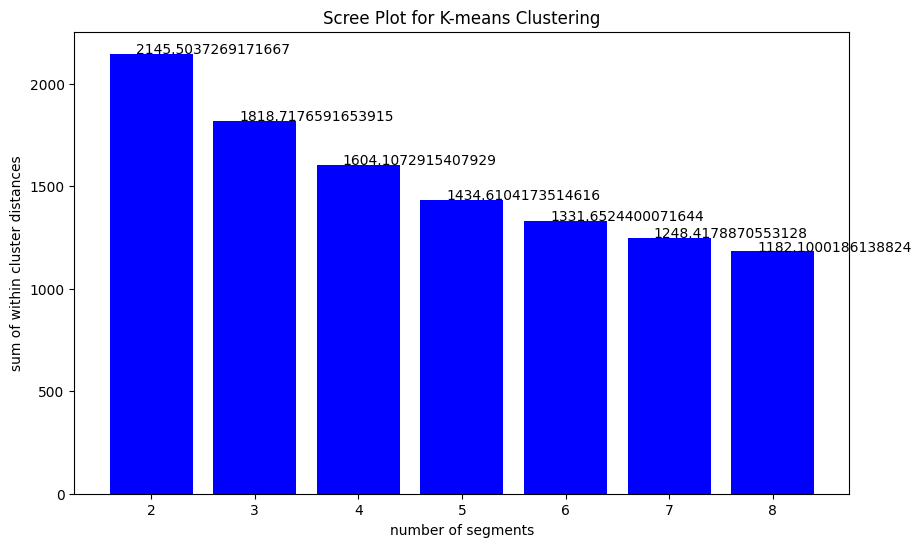

In [ ]:
for n_clusters, result in results.items():
    print(f"Results for {n_clusters} Segments:")
    print(f"  Cluster Distribution: {result['Cluster Distribution']}")

plt.figure(figsize=(10, 6))
bars = plt.bar(range(2, 9), inertias, color='blue')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')
plt.title('Scree Plot for K-means Clustering')
plt.xticks(range(2, 9))

for bar, inertia in zip(bars, inertias):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(inertia), fontsize=10, color='black')

plt.show()

In [ ]:
#average stability score for each number of clusters
average_stability = {k: np.mean(v) for k, v in stability_scores.items()}

#number of clusters with the highest stability score
optimal_clusters = max(average_stability, key=average_stability.get)

print("Average Stability Scores for Different Number of Clusters:")
for k, v in average_stability.items():
    print(f"  Clusters: {k}, Average Stability Score: {v:.3f}")

print(f"\nOptimal number of clusters based on stability: {optimal_clusters}")

Average Stability Scores for Different Number of Clusters:
  Clusters: 2, Average Stability Score: 1.000
  Clusters: 3, Average Stability Score: 0.957
  Clusters: 4, Average Stability Score: 0.910
  Clusters: 5, Average Stability Score: 0.765
  Clusters: 6, Average Stability Score: 0.779
  Clusters: 7, Average Stability Score: 0.741
  Clusters: 8, Average Stability Score: 0.706

Optimal number of clusters based on stability: 2


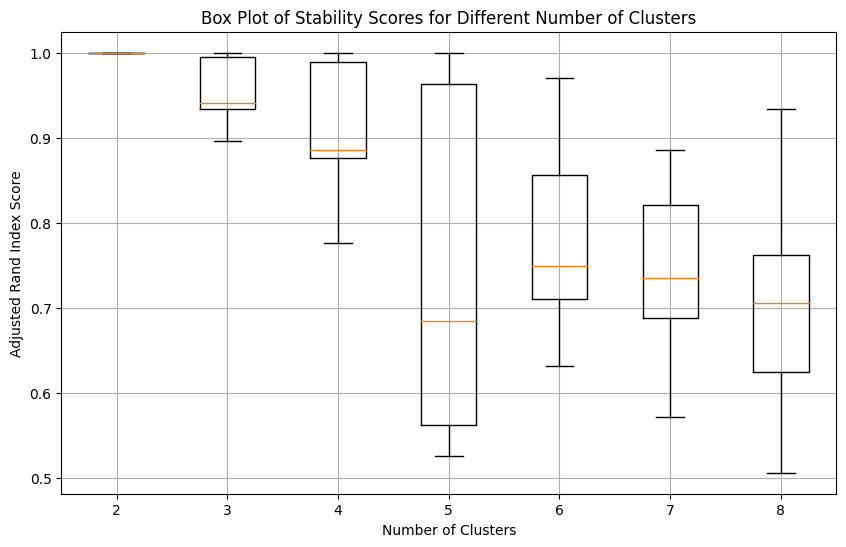

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([stability_scores[k] for k in range(2, 9)], labels=[str(k) for k in range(2, 9)])
plt.title('Box Plot of Stability Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index Score')
plt.grid(True)
plt.show()

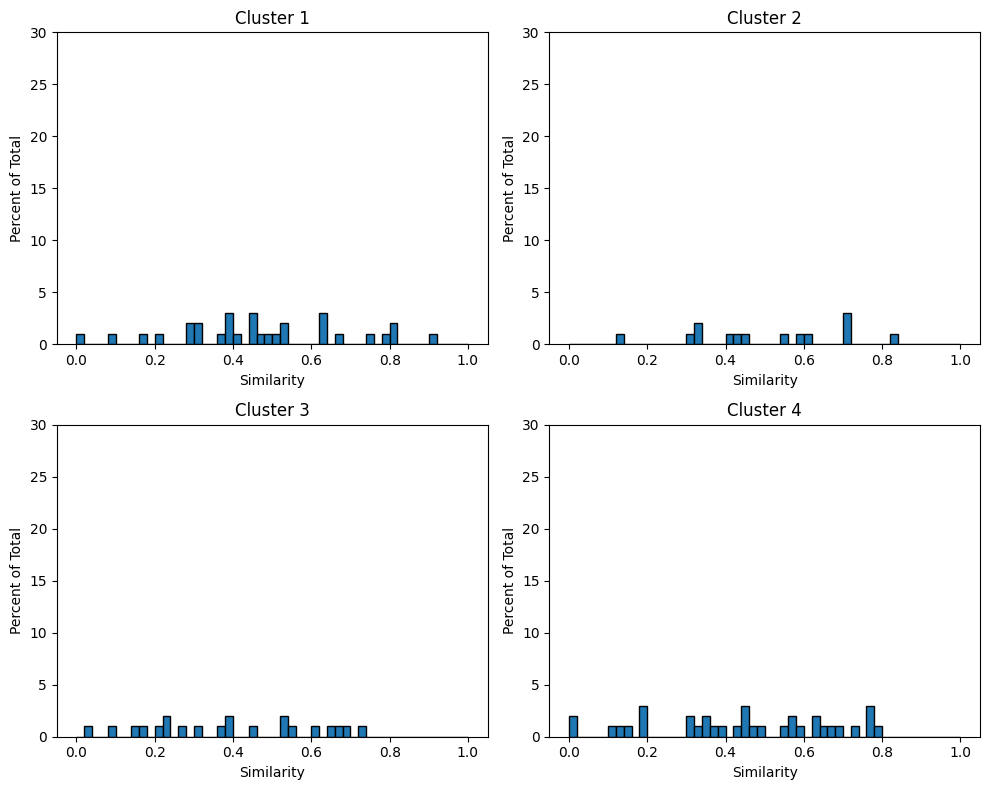

In [ ]:
np.random.seed(1234)
data = MD_x

kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(data)

# Assign each data point to the nearest cluster and calculate the distance from the centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


distances = np.sqrt(((data - centroids[labels]) ** 2).sum(axis=1))

similarities = 1 - (distances / np.max(distances))


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i in range(4):
    cluster_similarities = similarities[labels == i]
    axes[i].hist(cluster_similarities, bins=50, range=(0,1), edgecolor='black')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')
    axes[i].set_ylim(0, 30)

plt.tight_layout()
plt.show()

In [ ]:
#clustering
segment_stability_final = []

for segment in range(2, 9):
    kmeans = KMeans(n_clusters=segment, random_state=42)
    labels = kmeans.fit_predict(MD_x)
    segment_stability_final.append(labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

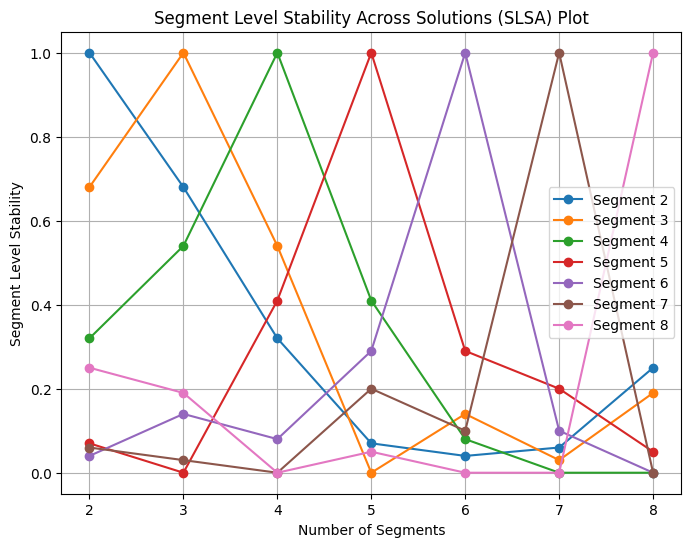

In [ ]:
plt.figure(figsize=(8, 6))

for i, segment in enumerate(range(2, 9)):
    plt.plot(range(2, 9), [np.mean(segment_stability_final[i] == labels) for labels in segment_stability_final], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(list(range(2, 9)))
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
segment_solutions = ["2", "3", "4", "5"]

In [ ]:
#KMeans model for each segment solution
MD_km28 = {}
for segment in segment_solutions:
    MD_km28[segment] = KMeans(n_clusters=int(segment), random_state=0).fit(MD_x)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
segment_labels = {}
segment_similarities = {}


In [ ]:
for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

In [ ]:
# Normalizing the similarities and preparing the stability values for the plot
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

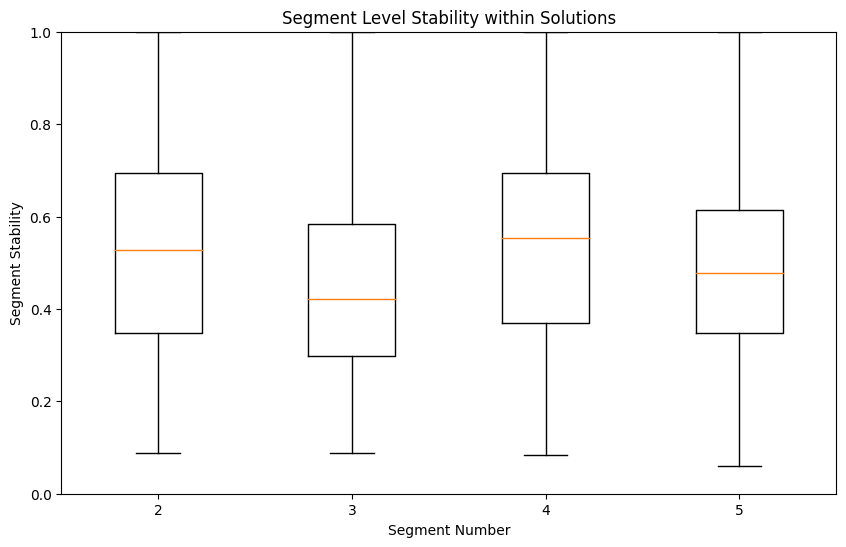

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()

# **A.5.2 Using Mixtures of Distributions**

In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
def classification_entropy(model, data):
    probs = model.predict_proba(data)
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # Adding a small value to avoid log(0)
    return entropy


In [ ]:
data = MD_x
results = []

In [ ]:
for k in range(2, 9):  # 2:8 in R
    model = GaussianMixture(n_components=k, random_state=1234).fit(data)

    entropy = classification_entropy(model, data)
    bic = model.bic(data)
    icl = bic - entropy

    results.append({
        "iter": model.n_iter_,
        "converged": model.converged_,
        "k": k,
        "logLik": model.score(data) * len(data),
        "AIC": model.aic(data),
        "BIC": bic,
        "ICL": icl
    })

In [ ]:
results_df = pd.DataFrame(results)

print(results_df)

   iter  converged  k     logLik        AIC         BIC         ICL
0     9       True  2 -23.453486  68.906972   97.563844   84.161284
1     9       True  3  -8.421977  50.843954   95.131847   83.023053
2    35       True  4  -2.293552  50.587105  110.506019   89.839769
3     6       True  5   0.765485  56.469029  132.018964  112.343267
4    14       True  6   9.053880  51.892240  143.073197  128.246378
5    17       True  7  14.517995  52.964009  159.775987  145.393401
6    11       True  8  14.269170  65.461660  187.904658  168.234365


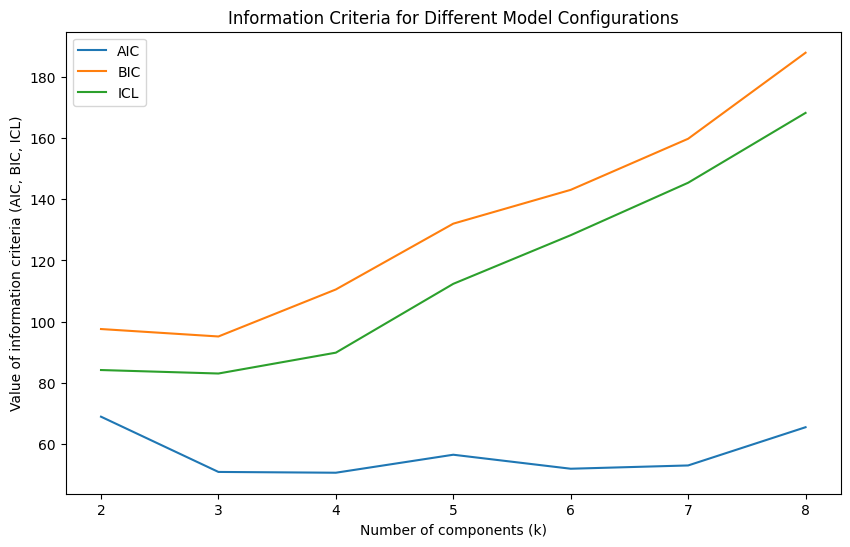

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df["k"], results_df["AIC"], label='AIC')
plt.plot(results_df["k"], results_df["BIC"], label='BIC')
plt.plot(results_df["k"], results_df["ICL"], label='ICL')
plt.xlabel('Number of components (k)')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Model Configurations')
plt.legend()
plt.show()

# **A.5.3 Using Mixtures of Regression Models**

In [ ]:
from patsy import dmatrices
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm

In [ ]:
mcdonald=pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/mcdonalds.csv')

In [ ]:
mcdonald.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
catogorical_to_numeric = {'I hate it!-5': '-5', 'I love it!+5': '+5'}
mcdonald['Like'].replace(catogorical_to_numeric, inplace=True)

In [ ]:
frequency_table = mcdonald['Like'].value_counts()

In [ ]:
sorted_frequency_table = frequency_table.sort_index(ascending=True)
print(sorted_frequency_table)

Like
+1    152
+2    187
+3    229
+4    160
+5    143
-1     58
-2     59
-3     73
-4     71
-5    152
0     169
Name: count, dtype: int64


In [ ]:
#converting like column to int
mcdonald['Like'] = mcdonald['Like'].apply(lambda x: int(x.replace('+', '')))

In [ ]:
columns = '+'.join(mcdonald.columns[0:11])
formula = f'Like ~ {columns}'
formula

'Like ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting'

In [ ]:
y, X = dmatrices(formula, data=mcdonald, return_type='dataframe')

In [ ]:
## Fit a Gaussian Mixture Model

gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [ ]:
labels = gmm.predict(X)
cluster_sizes = pd.Series(labels).value_counts().sort_index()
converged = gmm.converged_
n_iterations = gmm.n_iter_

In [ ]:
print("Cluster Sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Component {i + 1}: {size} data points")
print(f"Convergence after {n_iterations} iterations: {converged}")

Cluster Sizes:
Component 1: 468 data points
Component 2: 985 data points
Convergence after 7 iterations: True


In [ ]:
data_comp1 = mcdonald[labels == 0]
data_comp2 = mcdonald[labels == 1]


In [ ]:
y_comp1, X_comp1 = dmatrices(formula, data=data_comp1, return_type='dataframe')
y_comp2, X_comp2 = dmatrices(formula, data=data_comp2, return_type='dataframe')

In [ ]:
model_comp1 = sm.OLS(y_comp1, sm.add_constant(X_comp1)).fit()
model_comp2 = sm.OLS(y_comp2, sm.add_constant(X_comp2)).fit()

In [ ]:
print(model_comp1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     59.23
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.03e-80
Time:                        12:26:54   Log-Likelihood:                -1001.6
No. Observations:                 468   AIC:                             2027.
Df Residuals:                     456   BIC:                             2077.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4721      0.40

In [ ]:
print(model_comp2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     83.00
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          1.34e-104
Time:                        12:26:54   Log-Likelihood:                -1982.1
No. Observations:                 985   AIC:                             3982.
Df Residuals:                     976   BIC:                             4026.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0959      0.249  

In [ ]:
def create_summary(model):
    summary_df = pd.DataFrame({'Coef.': model.params, 'P>|t|': model.pvalues})
    conf_int = model.conf_int()
    summary_df['lower_ci'] = conf_int[0]
    summary_df['upper_ci'] = conf_int[1]
    return summary_df

In [ ]:
summary_comp1 = create_summary(model_comp1)
summary_comp2 = create_summary(model_comp2)

In [ ]:
def plot_coefficients(summary, ax, title, alpha=0.05, color_significant='black', color_insignificant='lightgrey'):
    y_labels = summary.index
    y_ticks = np.arange(len(y_labels))
    for i, (index, row) in enumerate(summary.iterrows()):
        coef, lower_ci, upper_ci, p_value = row['Coef.'], row['lower_ci'], row['upper_ci'], row['P>|t|']
        color = color_significant if p_value < alpha else color_insignificant
        # Calculate the errors from the coefficient to the confidence interval bounds
        err = [[coef - lower_ci], [upper_ci - coef]]
        ax.errorbar(coef, y_ticks[i], xerr=err, fmt='o', color=color, ecolor=color, capsize=3)

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.axvline(x=0, color='grey', linestyle='--', lw=0.5)
    ax.set_title(title)

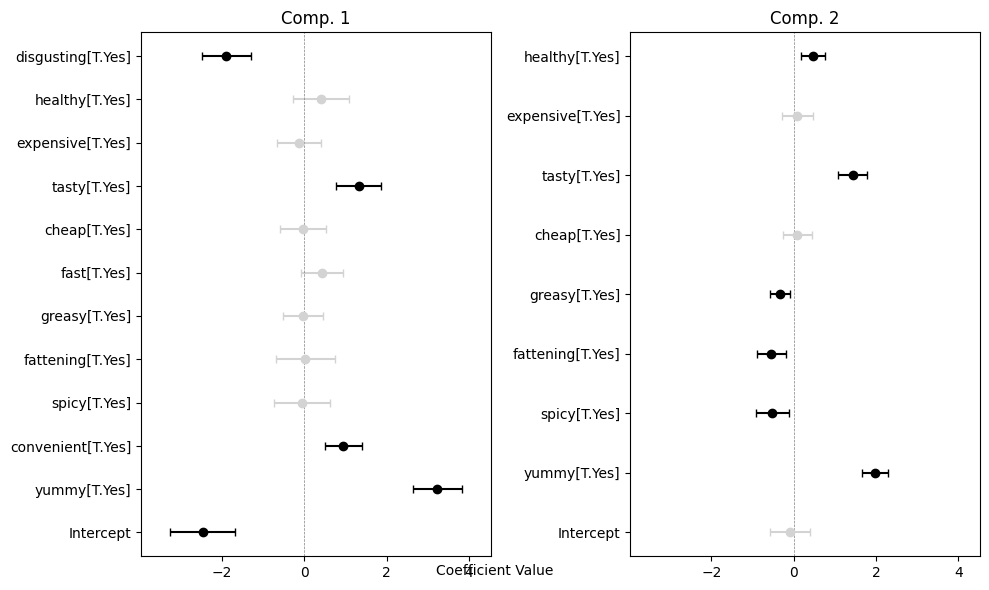

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
# Adjust the x-axis scale based on the confidence intervals

all_intervals = np.concatenate([summary_comp1['lower_ci'], summary_comp1['upper_ci'],
                                summary_comp2['lower_ci'], summary_comp2['upper_ci']])
x_min, x_max = all_intervals.min(), all_intervals.max()
x_margin = (x_max - x_min) * 0.1
x_min, x_max = x_min - x_margin, x_max + x_margin


plot_coefficients(summary_comp1, axs[0], 'Comp. 1')
plot_coefficients(summary_comp2, axs[1], 'Comp. 2')


axs[0].set_xlim(x_min, x_max)
axs[1].set_xlim(x_min, x_max)

fig.text(0.5, 0.04, 'Coefficient Value', ha='center', va='center')


plt.tight_layout()

plt.show()

# **A.6 Step 6: Profiling Segments**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/mcdonalds.csv')

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
attributes = data.iloc[:, :11]
label_encoder = LabelEncoder()
encoded_attributes = attributes.apply(label_encoder.fit_transform)
transposed_attributes = encoded_attributes.T

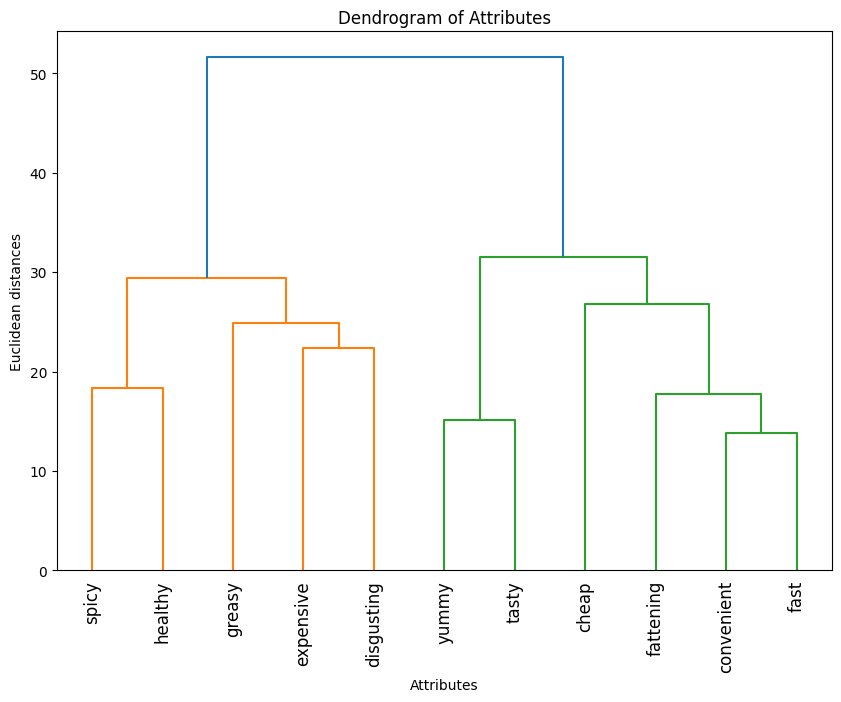

In [ ]:
linked_attributes = linkage(transposed_attributes, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked_attributes, labels=transposed_attributes.index, leaf_rotation=90)
plt.title("Dendrogram of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Euclidean distances")
plt.show()


order = [transposed_attributes.index[i] for i in dendrogram(linked_attributes, no_plot=True)['leaves']]
order.reverse()

In [ ]:
rearranged_attributes = encoded_attributes[order]

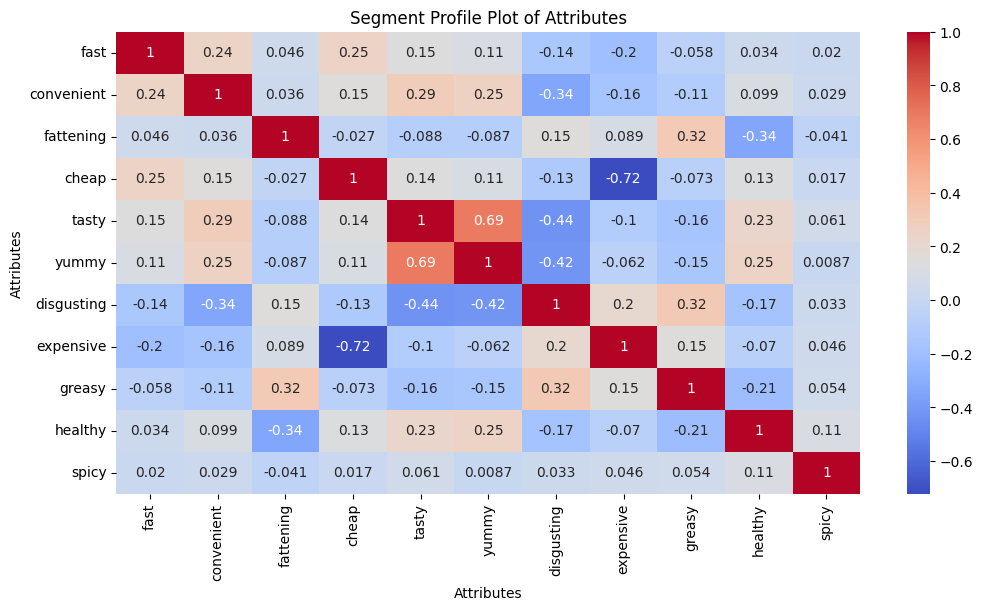

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(rearranged_attributes.corr(), annot=True, cmap='coolwarm')
plt.title("Segment Profile Plot of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

In [ ]:
# Performing K-means clustering to segment the data into four groups
kmeans = KMeans(n_clusters=4, random_state=1234)
segments = kmeans.fit_predict(encoded_attributes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index()

In [ ]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
df = pd.DataFrame(data, columns=attributes, index=clusters)
df.index = [f'{cluster}: {size} ({size/sum(cluster_sizes):.0%})' for cluster, size in zip(clusters, cluster_sizes)]
df.index

Index(['Cluster 1: 513 (35%)', 'Cluster 2: 366 (25%)', 'Cluster 3: 242 (17%)',
       'Cluster 4: 332 (23%)'],
      dtype='object')

In [ ]:
encoded_data_with_segments = encoded_attributes.copy()
encoded_data_with_segments['Segment'] = segments

In [ ]:
segment_means = encoded_data_with_segments.groupby('Segment').mean().iloc[:, :11]

In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
normalized_segment_means = (segment_means.T / segment_means.T.sum()).T

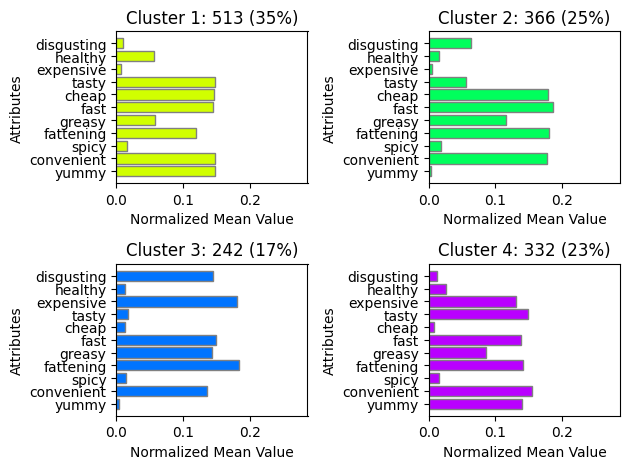

In [ ]:
for i, segment in enumerate(normalized_segment_means.index):
    plt.subplot(2, 2, i+1)
    plt.barh(normalized_segment_means.columns, normalized_segment_means.loc[segment],
             color=sns.color_palette("hsv", 4)[i],
             edgecolor='grey',
             label=f'{df.index}'
             )

    plt.title(f'{df.index[i]}')


    plt.xlim(0, normalized_segment_means.values.max() + 0.1)

    plt.xlabel('Normalized Mean Value')
    plt.ylabel('Attributes')

plt.tight_layout()
plt.show()

In [ ]:
# PCA transformation
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(MD_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


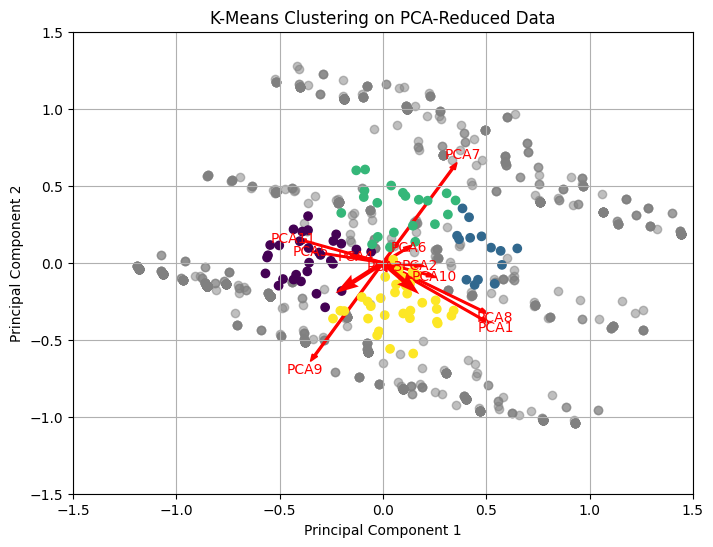

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)

for i, component in enumerate(rotation_matrix.T):
    plt.arrow(0, 0, component[0], component[1], color='red', width=0.01, head_width=0.03)
    plt.text(component[0] * 1.15, component[1] * 1.15, new_column_names[i], color='red', ha='center', va='center')


plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans.labels_, cmap='viridis')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")


for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r')


plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()

# **A.7 Step 7: Describing Segments**

In [150]:
from statsmodels.graphics.mosaicplot import mosaic

In [172]:
data = pd.read_csv('/content/gdrive/MyDrive/Projects/Feynn Labs AI/mcdonalds.csv')

In [173]:
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [174]:
print(data['Like'])

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object


In [175]:
#making changes to the values of column "Like" to be numeric eith their respective signs
import re
def extract_numeric(value):
    match = re.search(r'[-+]?\d+', value)
    return match.group() if match else None

In [176]:
data['Like'] = data['Like'].apply(extract_numeric)

In [177]:
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [178]:
binary_columns = data.columns[:-4]  # Excluding 'Like', 'Age', 'VisitFrequency', 'Gender'
for col in binary_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [179]:
kmeans = KMeans(n_clusters=4, random_state=1234)
data['cluster'] = kmeans.fit_predict(data[binary_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [180]:
contingency_table = pd.crosstab(data['cluster'], data['Like'])

<Figure size 1200x800 with 0 Axes>

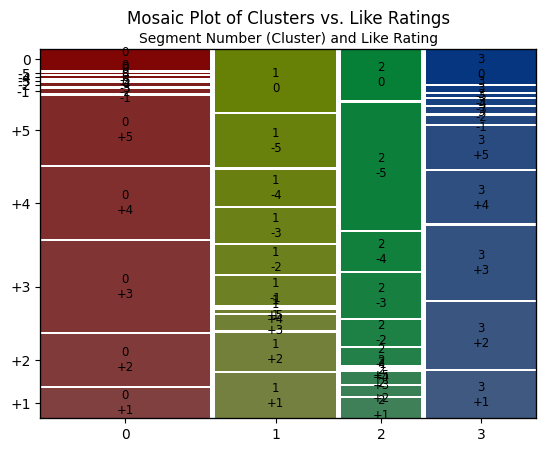

In [181]:
plt.figure(figsize=(12, 8))
mosaic(contingency_table.stack(), gap=0.01, title='Mosaic Plot of Clusters vs. Like Ratings')
plt.xlabel('Segment Number (Cluster) and Like Rating')
plt.ylabel('Frequency')
plt.show()

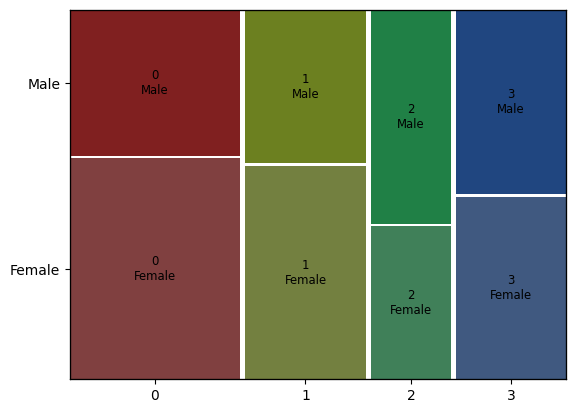

In [182]:
k4 = kmeans.labels_
ct = pd.crosstab(kmeans.labels_, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

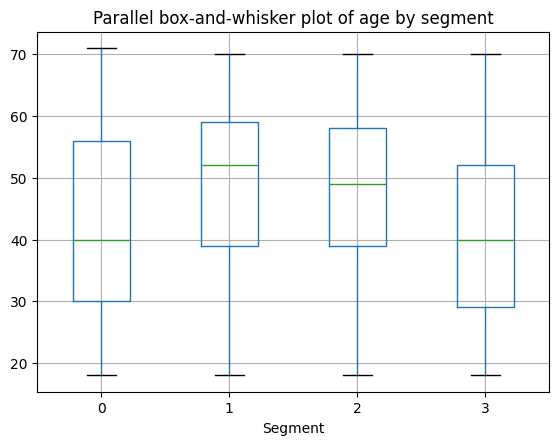

In [183]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [184]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df=data
# Mapping the 'VisitFrequency' column to an ordinal scale
ordinal_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
df['VisitFrequency'] = df['VisitFrequency'].map(ordinal_mapping)

#female =1 , male=0
df['Gender'] = (df['Gender'] == 'Female').astype(int)

X = df[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = (df['cluster'] == 3).astype(int)

tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X, y)


DecisionTreeClassifier(max_depth=3)

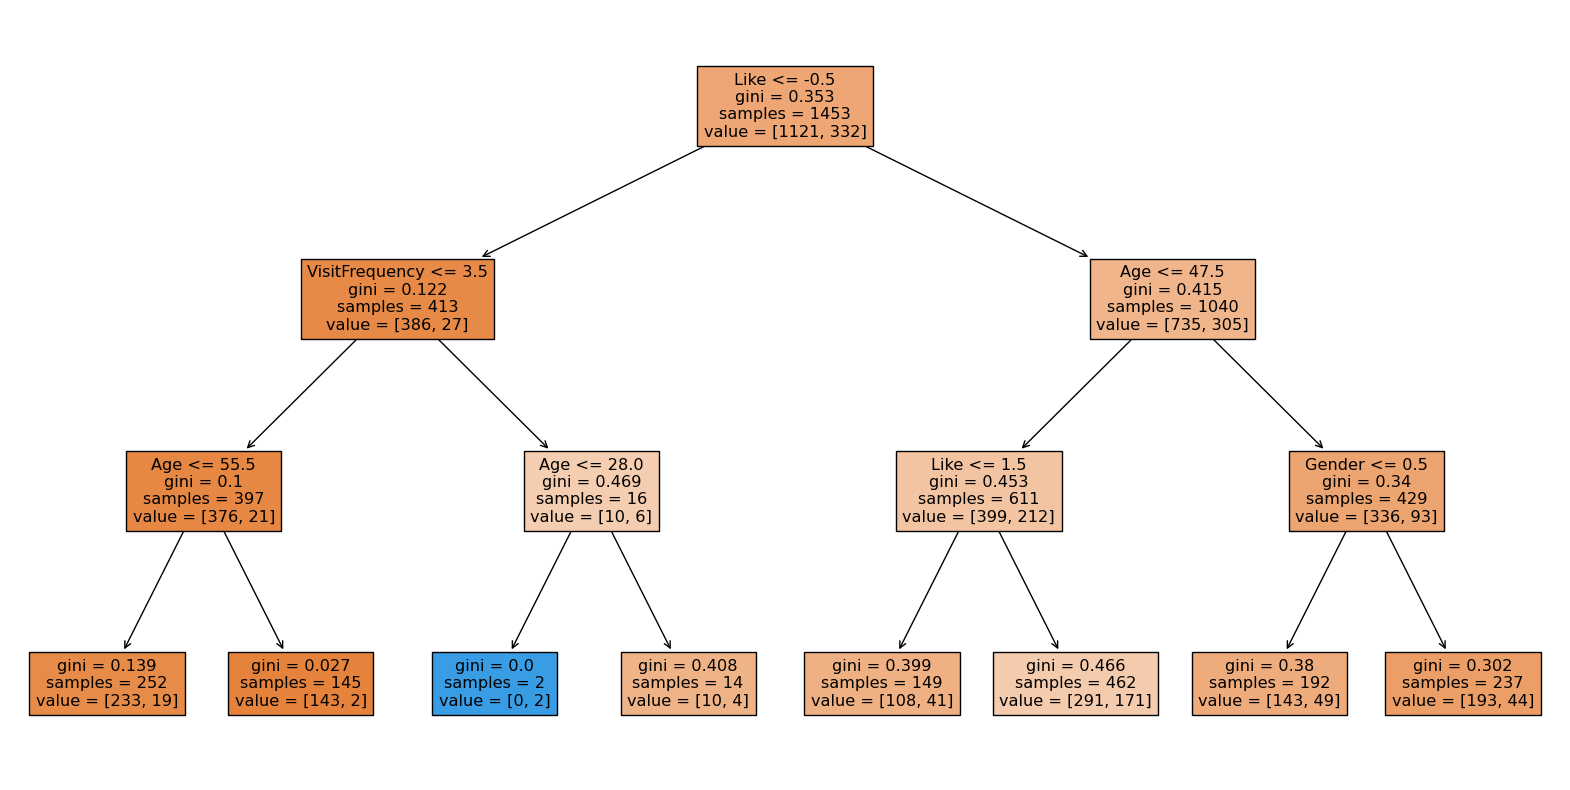

In [185]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns.tolist())
plt.show()

# **A.8 Step 8: Selecting (the) Target Segment(s)**

In [191]:
df = pd.DataFrame({'Segment': k4, 'VisitFrequency': data['VisitFrequency'], 'Like': data['Like'], 'Gender': data['Gender']})

#mean of each segment for each segment
visit_means = df.groupby('Segment')['VisitFrequency'].mean()

pd.DataFrame(visit_means)

,VisitFrequency
Segment,
0,3.019493
1,1.685792
2,1.417355
3,2.873494


In [192]:
#changing the column like to numeric values
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

like_means = df.groupby('Segment')['Like'].mean()
pd.DataFrame(like_means)

,Like
Segment,
0,2.920078
1,-1.218579
2,-2.652893
3,2.165663


In [193]:
#mean of like for each segment
like_means = df.groupby('Segment')['Like'].mean()
pd.DataFrame(like_means)

,Like
Segment,
0,2.920078
1,-1.218579
2,-2.652893
3,2.165663


In [194]:
female_means = df.groupby('Segment')['Gender'].mean()
pd.DataFrame(female_means)

,Gender
Segment,
0,0.602339
1,0.581967
2,0.417355
3,0.496988


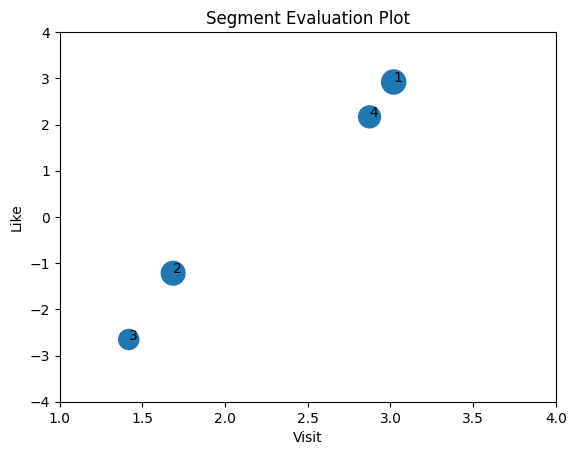

In [196]:
plt.scatter(visit_means, like_means , s=[500 * f for f in female_means])

plt.xlim(1, 4)
plt.ylim(-4, 4)

for i, (x, y) in enumerate(zip(visit_means, like_means)):
    plt.text(x, y, str(i+1))

plt.title("Segment Evaluation Plot")
plt.xlabel("Visit")
plt.ylabel("Like")

plt.show()